In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

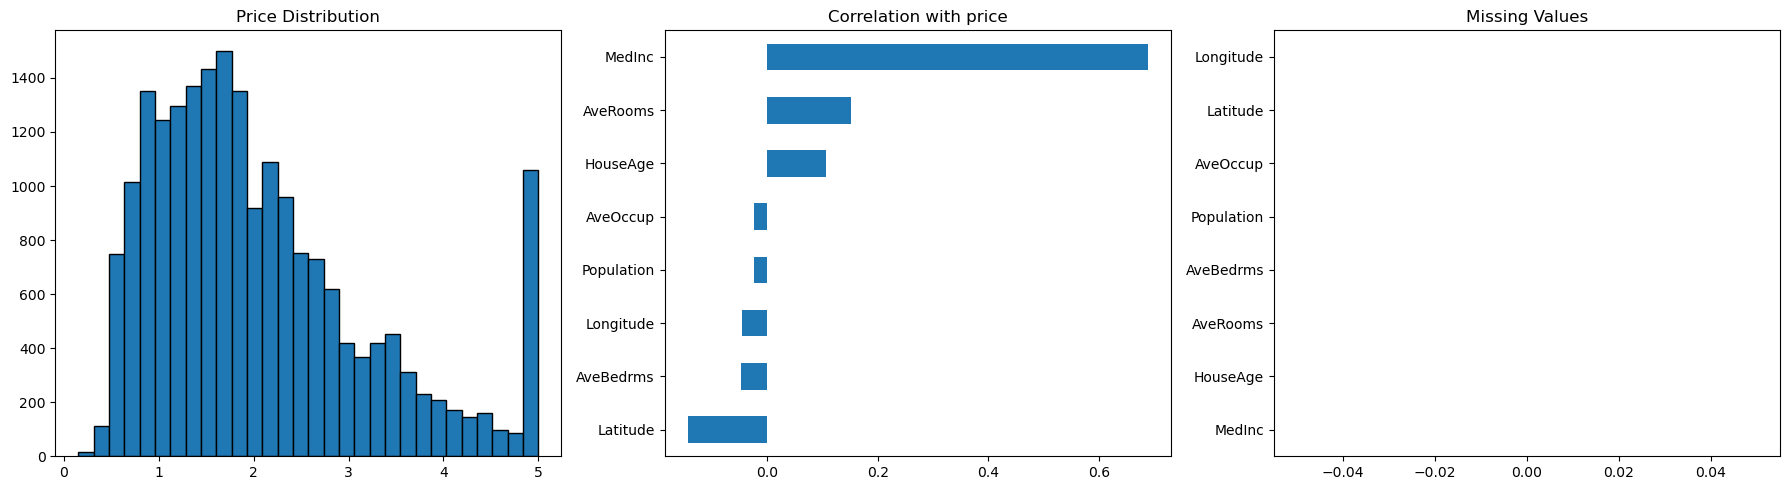

In [12]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].hist(y, bins=30, edgecolor='black')
axes[0].set_title("Price Distribution")

X.corrwith(y).sort_values().plot(kind='barh', ax=axes[1])
axes[1].set_title('Correlation with price')

X.isnull().sum().plot(kind='barh', ax=axes[2])
axes[2].set_title('Missing Values')

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"R² Score : {r2:.4f}")
print(f"RMSE in dollars : ${rmse*100000:.2f}")

R² Score : 0.5758
RMSE in dollars : $74558.1383
